## Quick Links:

1. https://alleninstitute.github.io/abc_atlas_access/notebooks/merfish_tutorial_part_1.html (main tutorial followed)
2. https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html (you will have to setup ccf)
3. https://alleninstitute.github.io/abc_atlas_access/notebooks/merfish_ccf_registration_tutorial.html (the link on their website)
4. see: reference/parcellation.csv
5. https://pmc.ncbi.nlm.nih.gov/articles/PMC6787288/ (some random study with serial two-photon tomography)
6. https://alleninstitute.github.io/abc_atlas_access/notebooks/abc_atlas_selection_example.html
7. https://knowledge.brain-map.org/abcatlas#AQEBSzlKTjIzUDI0S1FDR0s5VTc1QQACSFNZWlBaVzE2NjlVODIxQldZUAADBwFGUzAwRFhWMFQ5UjFYOUZKNFFFAAIAAAFRWTVTOEtNTzVITEpVRjBQMDBLAAIBMDIyIEw1IEVUIENUWCBHbHV0AAABMTVCSzQ3RENJT0YxU0xMVVc5UAACAAABQ0JHQzBVMzBWVjlKUFI2MFRKVQACAAABNzNHVlREWERFR0UyN00yWEpNVAACAAABSTlMTlAwTzFSTjhLNFNOMkdXWQACAVZJU3BtAAABVEZRRkxORVAzVjIyMlk4OEM2NAACAAAEAQAChexuHYN%2B0KIDhAo%2BJYNCd2oEMk5RVElFN1RBTVA4UFFBSE80UAAFga%2BmSoHprA6BoIFHgJLV6AYABwAABQAGAQECRlMwMERYVjBUOVIxWDlGSjRRRQADfgAAAAQAAAhWRk9GWVBGUUdSS1VEUVVaM0ZGAAlMVkRCSkFXOEJJNVlTUzFRVUJHAAoACwFUTE9LV0NMOTVSVTAzRDlQRVRHAAI3M0dWVERYREVHRTI3TTJYSk1UAAMBBAEAAiMwMDAwMDAAA8gBAAUBAQIjMDAwMDAwAAPIAQAAAAIBAA%3D%3D (helps in visualizing the certain supertype like L5.ET.CTX.Glut - just to get an understanding of what we are trying to search for in this notebook)
8. https://alleninstitute.github.io/abc_atlas_access/descriptions/notebook_subtitle3.html (this is helpful because this all the merfish tutorials are lited on this one page - although I roughly went through all of them I only found the first one helpful)

## Steps Taken:

1. Running the steps in the tutorial: https://alleninstitute.github.io/abc_atlas_access/notebooks/merfish_tutorial_part_1.html
2. Realizing somewhere in between I can find L6.CT.CTX.Glut in the files so writing code to plot required sections

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from pathlib import Path

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [2]:
df = pd.read_excel("MapMySections_EntrantData.xlsx", sheet_name="Column Descriptions")
cell_supertypes = df["Column Name"][9:].tolist()
print(cell_supertypes)

['ABC.NN', 'Astro.TE.NN', 'CLA.EPd.CTX.Car3.Glut', 'Endo.NN', 'L2.3.IT.CTX.Glut', 'L4.5.IT.CTX.Glut', 'L5.ET.CTX.Glut', 'L5.IT.CTX.Glut', 'L5.NP.CTX.Glut', 'L6.CT.CTX.Glut', 'L6.IT.CTX.Glut', 'L6b.CTX.Glut', 'Lamp5.Gaba', 'Lamp5.Lhx6.Gaba', 'Lymphoid.NN', 'Microglia.NN', 'OPC.NN', 'Oligo.NN', 'Peri.NN', 'Pvalb.Gaba', 'Pvalb.chandelier.Gaba', 'SMC.NN', 'Sncg.Gaba', 'Sst.Chodl.Gaba', 'Sst.Gaba', 'VLMC.NN', 'Vip.Gaba']


In [3]:
download_base = Path('../../data/abc_atlas')
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20250531/manifest.json'

In [4]:
cell = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850',
    file_name='cell_metadata',
    dtype={"cell_label": str}
)
cell.set_index('cell_label', inplace=True)
print("Number of cells = ", len(cell))
cell.head(5)

Number of cells =  3938808


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,abc_sample_id
cell_label,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,c9881423-76a7-4835-ba8b-7942fd384b6b
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,aa815488-6487-4e47-8a5e-d82ac9933bc6
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,91ef7a85-8e3e-4410-8ee2-785788df3ebe
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,18991e17-fbd3-4ba0-9c60-1281f56ac520
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,5e155936-e40d-4c6b-8971-e7fb0079274b


In [5]:
def print_column_info(df):
    for c in df.columns:
        grouped = df[[c]].groupby(c).count()
        members = ''
        if len(grouped) < 30:
            members = str(list(grouped.index))
        print("Number of unique %s = %d %s" % (c,len(grouped), members))

print_column_info(cell)

Number of unique brain_section_label = 59 
Number of unique cluster_alias = 5320 
Number of unique average_correlation_score = 3932069 
Number of unique feature_matrix_label = 1 ['C57BL6J-638850']
Number of unique donor_label = 1 ['C57BL6J-638850']
Number of unique donor_genotype = 1 ['wt/wt']
Number of unique donor_sex = 1 ['M']
Number of unique x = 3938808 
Number of unique y = 3938808 
Number of unique z = 59 
Number of unique abc_sample_id = 3938808 


In [6]:
cluster_details = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership_pivoted',
    keep_default_na=False
)
cluster_details.set_index('cluster_alias', inplace=True)
cluster_details

,neurotransmitter,class,subclass,supertype,cluster
cluster_alias,,,,,
1,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3
2,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0327 L2 IT PPP-APr Glut_3
3,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0322 L2 IT PPP-APr Glut_2
4,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0323 L2 IT PPP-APr Glut_2
5,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0325 L2 IT PPP-APr Glut_2
...,...,...,...,...,...
34368,GABA-Glyc,27 MY GABA,288 MDRN Hoxb5 Ebf2 Gly-Gaba,1102 MDRN Hoxb5 Ebf2 Gly-Gaba_1,4955 MDRN Hoxb5 Ebf2 Gly-Gaba_1
34372,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4901 MY Lhx1 Gly-Gaba_3
34374,GABA-Glyc,27 MY GABA,285 MY Lhx1 Gly-Gaba,1091 MY Lhx1 Gly-Gaba_3,4902 MY Lhx1 Gly-Gaba_3


In [7]:
print(cluster_details["supertype"].tolist()[:10])

['0082 L2 IT PPP-APr Glut_3', '0082 L2 IT PPP-APr Glut_3', '0081 L2 IT PPP-APr Glut_2', '0081 L2 IT PPP-APr Glut_2', '0081 L2 IT PPP-APr Glut_2', '0080 L2 IT PPP-APr Glut_1', '0080 L2 IT PPP-APr Glut_1', '0080 L2 IT PPP-APr Glut_1', '0080 L2 IT PPP-APr Glut_1', '0083 L2 IT PPP-APr Glut_4']


In [8]:
cluster_details["supertype_edited"] = cluster_details["supertype"].apply(
    lambda x: ".".join(x[5:].split(" "))
)

In [9]:
cluster_colors = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_to_cluster_annotation_membership_color')
cluster_colors.set_index('cluster_alias', inplace=True)
cluster_colors

,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cluster_alias,,,,,
1,#2B93DF,#FA0087,#0F6632,#266DFF,#64661F
2,#2B93DF,#FA0087,#0F6632,#266DFF,#CCA73D
3,#2B93DF,#FA0087,#0F6632,#002BCC,#99000D
4,#2B93DF,#FA0087,#0F6632,#002BCC,#5C8899
5,#2B93DF,#FA0087,#0F6632,#002BCC,#473D66
...,...,...,...,...,...
34368,#820e57,#0096C7,#660038,#5CCCA4,#500099
34372,#820e57,#0096C7,#f20985,#976df9,#0F6627
34374,#820e57,#0096C7,#f20985,#976df9,#2E4799


In [10]:
cell_extended = cell.join(cluster_details, on='cluster_alias')
cell_extended = cell_extended.join(cluster_colors, on='cluster_alias')
cell_extended.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,class,subclass,supertype,cluster,supertype_edited,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,04 DG-IMN Glut,038 DG-PIR Ex IMN,0141 DG-PIR Ex IMN_2,0515 DG-PIR Ex IMN_2,DG-PIR.Ex.IMN_2,#666666,#16f2f2,#3D53CC,#CC7A3D,#73FFBF
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,PG-TRN-LRN.Fat2.Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63


In [11]:
def plot_section(xx, yy, cc = None, val = None, fig_width = 8, fig_height = 8, cmap = None):
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    if cmap is not None:
        plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None:
        plt.scatter(xx, yy, s=0.5, color=cc, marker='.')
    ax.set_ylim(11, 0)
    ax.set_xlim(0, 11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return fig, ax

In [12]:
pred = cell_extended['supertype_edited'].str.contains('L6.CT.CTX.Glut', na=False)
section = cell_extended[pred]
print("Number of cells with 'L6.CT.CTX.Glut' in supertype_edited:", len(section))

Number of cells with 'L6.CT.CTX.Glut' in supertype_edited: 109972


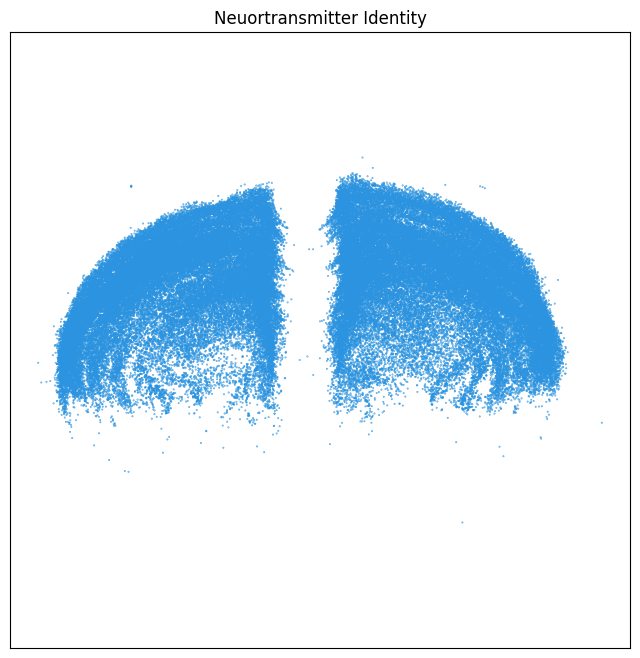

In [13]:
fig, ax = plot_section(section['x'], section['y'], section['neurotransmitter_color'])
res = ax.set_title("Neuortransmitter Identity")
plt.show()

ABC.NN
Number of cells with ABC.NN in supertype_edited: 20989


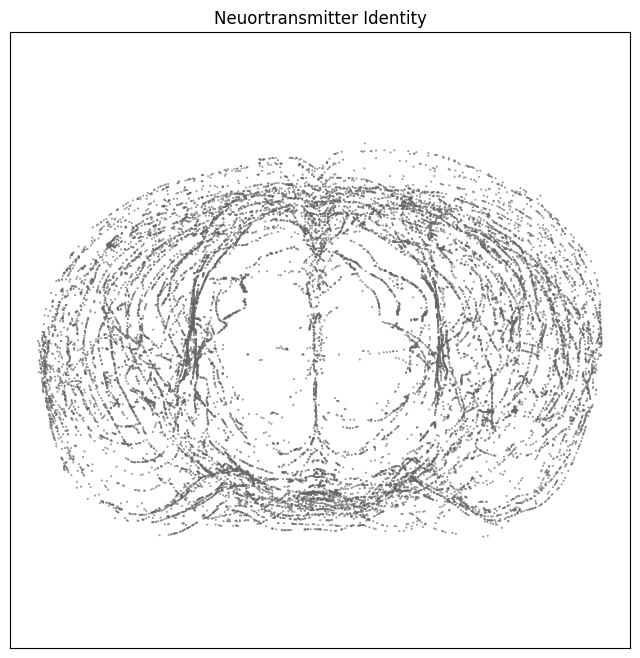

In [14]:
idx_cell_supertype = 0
print(cell_supertypes[idx_cell_supertype])
pred = cell_extended['supertype_edited'].str.contains(cell_supertypes[idx_cell_supertype], na=False)
section = cell_extended[pred]
print(f"Number of cells with {cell_supertypes[idx_cell_supertype]} in supertype_edited:", len(section))
fig, ax = plot_section(section['x'], section['y'], section['neurotransmitter_color'])
res = ax.set_title("Neuortransmitter Identity")
plt.show()

In [15]:
section.columns

Index(['brain_section_label', 'cluster_alias', 'average_correlation_score',
       'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex',
       'x', 'y', 'z', 'abc_sample_id', 'neurotransmitter', 'class', 'subclass',
       'supertype', 'cluster', 'supertype_edited', 'neurotransmitter_color',
       'class_color', 'subclass_color', 'supertype_color', 'cluster_color'],
      dtype='object')